<a href="https://colab.research.google.com/github/jjennings955/Neural-Network-Notebooks/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - Machine Learning Practical
Due Date: Tuesday April 2nd @ 11:59 PM on blackboard

The goal of this assignment is to experiment with your previous Linear Regression and Logistic regression models to explore some of the practical skills previously covered in the course:
- Learning curves
- Regularization
- Model selection

For this assignment, you are given some boilerplate code in the form of a jupyter notebook. Your task is to fill in the blanks.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing
import sklearn.model_selection

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import SGD

def logistic_regression(num_inputs, regularization, learning_rate):
  model = Sequential()
  model.add(Dense(1, input_shape=(num_inputs,), activation='sigmoid', kernel_regularizer=l2(regularization)))
  model.compile(optimizer=SGD(learning_rate), loss='binary_crossentropy', metrics=['acc', keras.metrics.binary_crossentropy])
  return model

In [0]:
# This cell loads the data
import pandas as pd
import numpy as np
dataset = sklearn.datasets.load_breast_cancer()
X = dataset['data']
y = dataset['target']
print(X.shape)
print(y.shape)

(569, 30)
(569,)


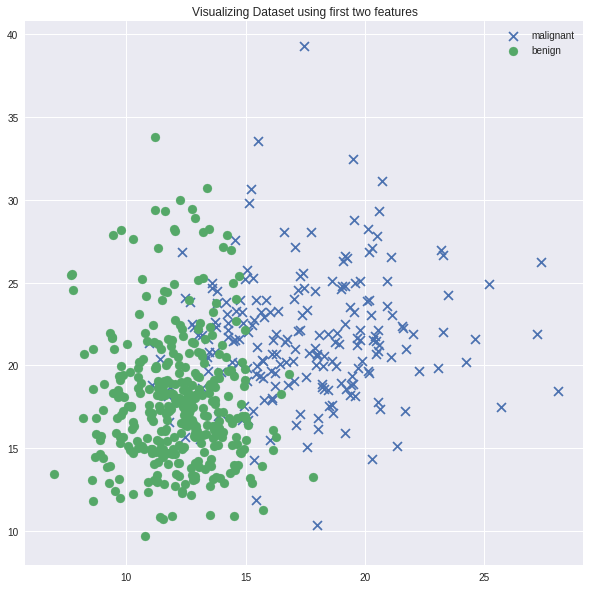

In [0]:
# This cell visualizes the first two features of the dataset. There are actually 30 features.
f, ax = plt.subplots(1,1, figsize=(10, 10))
malignant = X[y == 0]
benign = X[y == 1]
ax.scatter(malignant[:, 0], malignant[:, 1], marker='x', s=80, label='malignant')
ax.scatter(benign[:, 0], benign[:, 1], marker='o', s=80, label='benign')
ax.set_title("Visualizing Dataset using first two features")
ax.legend();

In [0]:
# This code creates a logistic regression model to train on the first two inputs features, with 0 regularization, and a learning rate of 0.0001
# See the keras documentation for how to use model.fit
# https://keras.io/models/model/#fit

model = logistic_regression(num_inputs=2, regularization=0, learning_rate=0.0001)
history = model.fit(X[:, [0,1]], y, epochs=5, batch_size=16, validation_split=0.2)

# The fit function returns a 'history' object that contains the metrics tracked during training

print('validation accuracy', history.history['val_acc'])
print('training accuracy', history.history['acc'])
print("These are the different metrics you can extract from the history object:", history.history.keys())

Train on 455 samples, validate on 114 samples
Epoch 1/5
455/455 [==============================] - 8s 18ms/step - loss: 9.5292 - acc: 0.4088 - binary_crossentropy: 9.5292 - val_loss: 12.4420 - val_acc: 0.2281 - val_binary_crossentropy: 12.4420
Epoch 2/5
455/455 [==============================] - 0s 160us/step - loss: 9.5292 - acc: 0.4088 - binary_crossentropy: 9.5292 - val_loss: 12.4420 - val_acc: 0.2281 - val_binary_crossentropy: 12.4420
Epoch 3/5
455/455 [==============================] - 0s 162us/step - loss: 9.5292 - acc: 0.4088 - binary_crossentropy: 9.5292 - val_loss: 12.4420 - val_acc: 0.2281 - val_binary_crossentropy: 12.4420
Epoch 4/5
455/455 [==============================] - 0s 163us/step - loss: 9.5292 - acc: 0.4088 - binary_crossentropy: 9.5292 - val_loss: 12.4420 - val_acc: 0.2281 - val_binary_crossentropy: 12.4420
Epoch 5/5
455/455 [==============================] - 0s 161us/step - loss: 9.5292 - acc: 0.4088 - binary_crossentropy: 9.5292 - val_loss: 12.4420 - val_acc: 0.

In [0]:
# Create polynomial features
poly = sklearn.preprocessing.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split into training and validation data
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_poly, y)

In [0]:
# You should use X_train, y_train and X_val, y_val from now on, for your training set/validation sets respectively
X_val.shape

(143, 496)

In [0]:
# Normalize your data IN THIS CELL by subtracting the mean and dividing by the standard deviation.
# Normalize it in place (so use the same variable names X_train, X_val, etc)


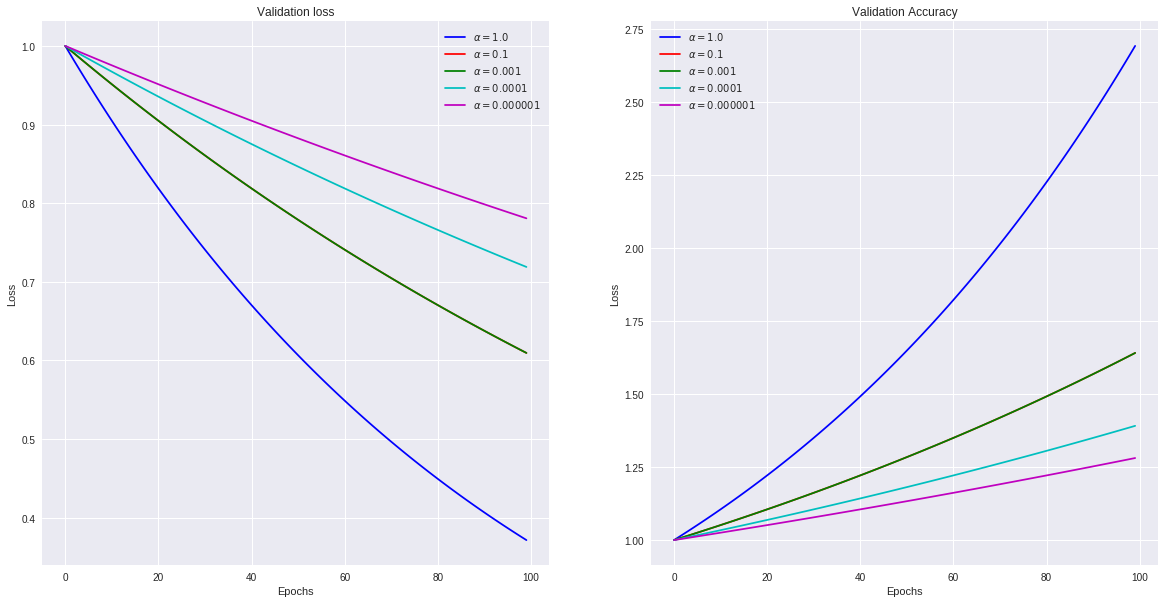

In [0]:
# Train 5 logistic regression models in a for loop on this data with, with 0 regularization, and vary the value of the learning rate using the values 1.0, 0.1, 0.001, 0.0001, 0.000001
# Use a batch size of 32
# Train for 50 epochs
# plot the validation loss for all 5 models on one plot, and the validation accuracy for all 5 models on a separate plot
# Modify the code IN THIS CELL for this task, you should replace the repeated code with a for loop

f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot 5 curves on the same plot
indices = np.float32(range(100))
ax[0].set_title("Validation loss")
ax[0].plot(indices, np.exp(-indices/100.), 'b', label=r'$\alpha = 1.0$') 
ax[0].plot(indices, np.exp(-indices/200.), 'r', label=r'$\alpha = 0.1$') 
ax[0].plot(indices, np.exp(-indices/200.), 'g', label=r'$\alpha = 0.001$') 
ax[0].plot(indices, np.exp(-indices/300.), 'c', label=r'$\alpha = 0.0001$') 
ax[0].plot(indices, np.exp(-indices/400.), 'm', label=r'$\alpha = 0.000001$') 
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend();

indices = np.float32(range(100))
ax[1].set_title("Validation Accuracy")
ax[1].plot(indices, np.exp(indices/100.), 'b', label=r'$\alpha = 1.0$') 
ax[1].plot(indices, np.exp(indices/200.), 'r', label=r'$\alpha = 0.1$') 
ax[1].plot(indices, np.exp(indices/200.), 'g', label=r'$\alpha = 0.001$') 
ax[1].plot(indices, np.exp(indices/300.), 'c', label=r'$\alpha = 0.0001$') 
ax[1].plot(indices, np.exp(indices/400.), 'm', label=r'$\alpha = 0.000001$') 
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();

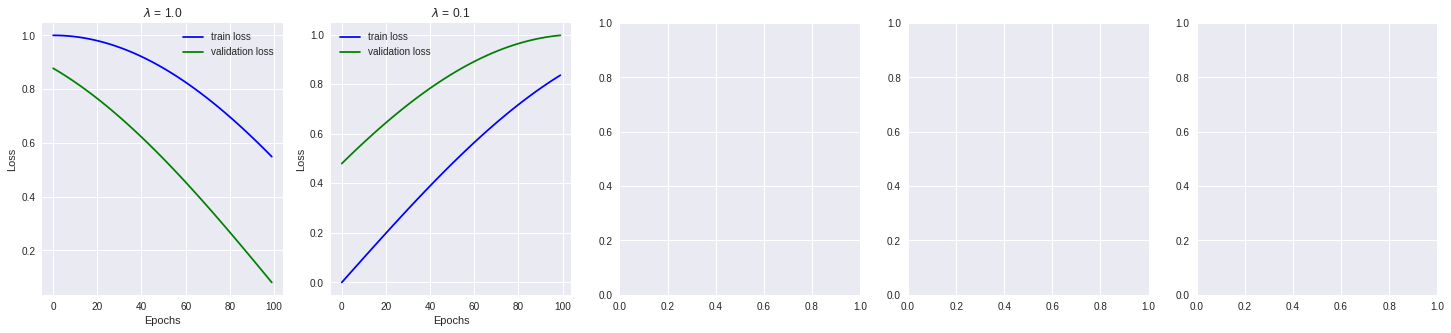

In [0]:
# Choose the best learning rate from the previous experiment

# Train 5 logistic regression models on this data with the following values for lambda: 1.0, 0.1, 0.001, 0.0001, 0.000001
# Plot your learning curve for each model (train and validation loss together, so 2 curves on each plot)
# Use a batch size of 32
# Train for 50 epochs
# Modify the code IN THIS CELL for this task


f, ax = plt.subplots(1, 5, figsize=(25, 5))

# The code below plots two curves on each subplot, and labels them
indices = np.float32(range(100))

ax[0].plot(indices, np.cos(indices/100.), 'b', label='train loss') # You should replace these artificial cos/sin functions with your actual loss values!
ax[0].plot(indices, np.cos(indices/100. + 0.5), 'g', label='validation loss')
ax[0].set_title('$\lambda$ = 1.0')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(indices, np.sin(indices/100.), 'b', label='train loss')
ax[1].plot(indices, np.sin(indices/100. + 0.5), 'g', label='validation loss')
ax[1].set_title('$\lambda$ = 0.1')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();
